In [127]:
# Iportando librerias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

## **1. Cargando el dataframe**

In [128]:
os.getcwd() # Obtener la carpeta como de raiz

df = pd.read_excel('data/Retail_Invoices.xlsx')

df.head()

,InvoiceNo,InvoiceDate,CustomerID,Quantity,price_total,StockCode
0,536365,2010-12-01,17850,40,139.12,7
1,536366,2010-12-01,17850,12,22.20,2
2,536367,2010-12-01,13047,83,278.73,12
3,536368,2010-12-01,13047,15,70.05,4
4,536369,2010-12-01,13047,3,17.85,1


In [129]:
print(f'El dataframe tiene un total de {df.shape[0]} filas y {df.shape[1]} columnas')

El dataframe tiene un total de 22190 filas y 6 columnas


## **2. EDA**

### **2.1 Revisión columnas**

In [130]:
# Identificando los tipos de datos y viendo si hay nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22190 entries, 0 to 22189
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    22190 non-null  object        
 1   InvoiceDate  22190 non-null  datetime64[ns]
 2   CustomerID   22190 non-null  int64         
 3   Quantity     22190 non-null  int64         
 4   price_total  22190 non-null  float64       
 5   StockCode    22190 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 1.0+ MB


### **Insight**:

- No hay datos nulos.
- InvoiceNo es obj cuando deberia ser numérico.
- Tenemos la mayoría de datos numéricos

In [131]:
# Convirtiendo a numérico InvoiceNo

try:
    
    df['InvoiceNo'] = pd.to_numeric(df['InvoiceNo'])

except:
    
    df['InvoiceNo'] = df['InvoiceNo'].astype(str).str.replace(r'[a-zA-Z]+', '', regex=True).astype('int')

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22190 entries, 0 to 22189
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    22190 non-null  int64         
 1   InvoiceDate  22190 non-null  datetime64[ns]
 2   CustomerID   22190 non-null  int64         
 3   Quantity     22190 non-null  int64         
 4   price_total  22190 non-null  float64       
 5   StockCode    22190 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 1.0 MB


### **2.2 Duplicados**

In [133]:
total_duplicados = df.duplicated().sum()

print(f'El total de duplicados es de {total_duplicados}')

El total de duplicados es de 0


In [134]:
numeric_cols = df.drop(columns='InvoiceDate', axis=1).columns.to_list()
numeric_cols

['InvoiceNo', 'CustomerID', 'Quantity', 'price_total', 'StockCode']

## **3. ESTADÍSTICAS PRINCIPALES**

In [135]:
df[numeric_cols[1:]].describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,22190.0,15238.498738,1733.149624,12346.0,13755.0000,15136.000,16746.0000,18287.0
Quantity,22190.0,221.130599,1170.215301,-80995.0,30.0000,120.000,254.0000,80995.0
price_total,22190.0,374.045327,2018.482869,-168469.6,87.9625,241.505,418.0225,168469.6
StockCode,22190.0,18.333889,23.892111,1.0,3.0000,12.000,24.0000,542.0


**Insights**:

1.  Lo primero que salta a la vista es los valores negativos tanto de Quantity y price_total los que no tienen sentido en el contexto de nuestro problema

2.  Igual puede ser que los valores maximos esten muy altos... pero primero tendremos que sacar los negativos para evitar la influencia de estos en la media.

3.  Hay un usuario que se llevo 542 objetos distintos lo que parece bastante extraño

In [136]:
for col in numeric_cols:
    print(f'\n Para la columna {col} existen {len(df[col].unique())} registros distintos')
    print(f'=='*30)




 Para la columna InvoiceNo existen 22190 registros distintos

 Para la columna CustomerID existen 4372 registros distintos

 Para la columna Quantity existen 1594 registros distintos

 Para la columna price_total existen 16534 registros distintos

 Para la columna StockCode existen 199 registros distintos


### **3.1. price_total y**

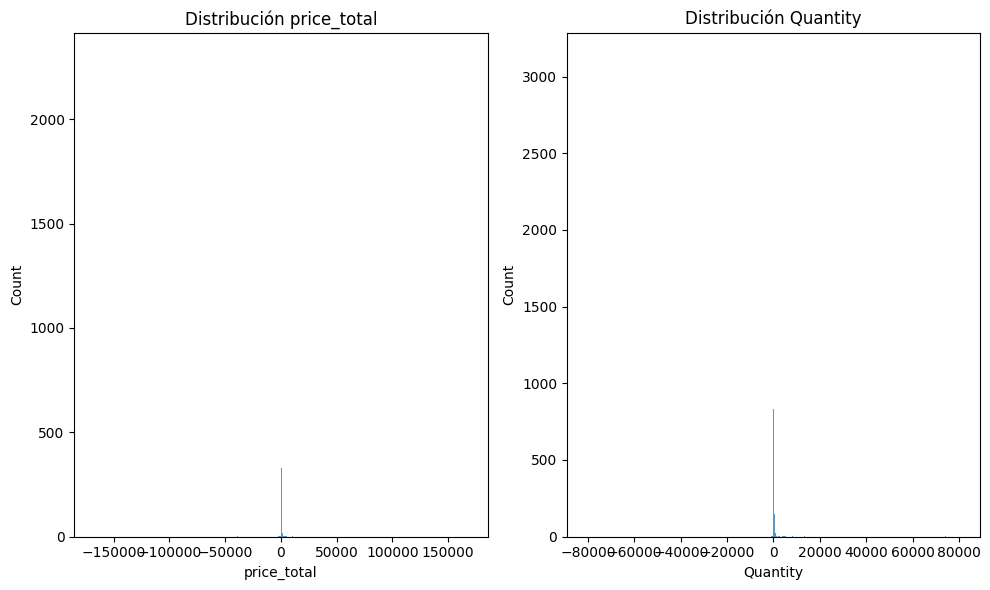

In [137]:
plt.figure(figsize=(10, 6))

# Gráfico 1
plt.subplot(121) 
sns.histplot(df['price_total'])
plt.title('Distribución price_total')

# Gráfico 2
plt.subplot(122) 
sns.histplot(df['Quantity'])
plt.title('Distribución Quantity')

plt.tight_layout()
plt.show()

Es claro que existen dratos que son demasiado alejados de la tendencia real de estos por eso nuestros gráficos se ven de esa manera.

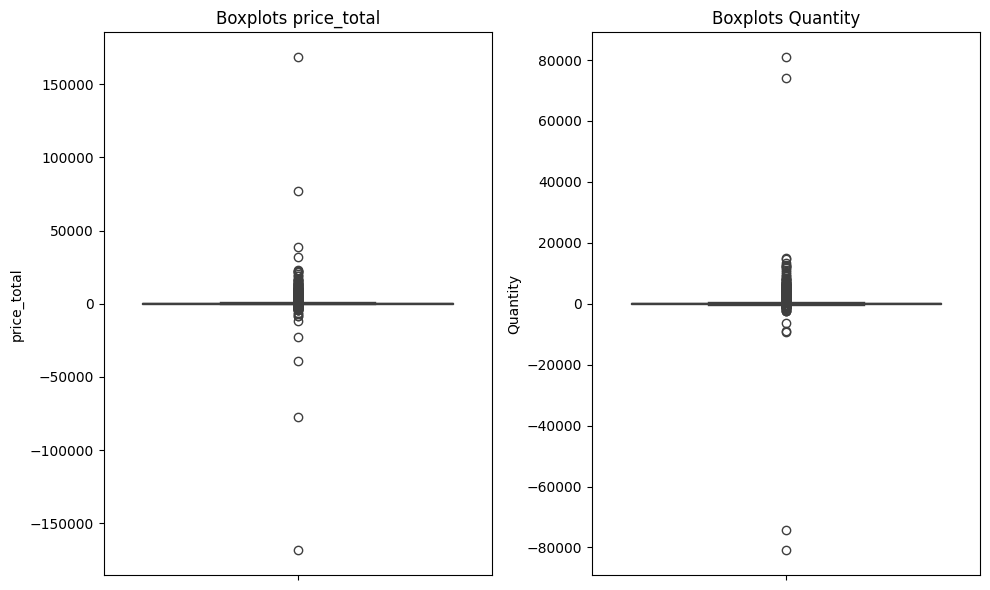

In [138]:
plt.figure(figsize=(10, 6))

# Gráfico 1
plt.subplot(121) 
sns.boxplot(df['price_total'])
plt.title('Boxplots price_total')

# Gráfico 2
plt.subplot(122) 
sns.boxplot(df['Quantity'])
plt.title('Boxplots Quantity')

plt.tight_layout()
plt.show()

En los boxplots también se observa lo mismo, existen outliers tanto positivos como negativos

In [140]:
def outliers_index(df, col):

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5*IQR)
    upper_bound = Q3 + (1.5*IQR)


    indices_atipicos = df[col].index[(df[col] < lower_bound) | (df[col] > upper_bound)].tolist()
    return indices_atipicos

In [141]:
outliers_index_pricetotal = outliers_index(df, 'price_total')

df.iloc[outliers_index_pricetotal, :]

,InvoiceNo,InvoiceDate,CustomerID,Quantity,price_total,StockCode
20,536387,2010-12-01,16029,1440,3193.92,5
23,536390,2010-12-01,17511,1568,1825.74,24
26,536394,2010-12-01,13408,544,1024.68,11
54,536477,2010-12-01,16210,1070,2474.74,14
71,536531,2010-12-01,15485,416,950.09,23
...,...,...,...,...,...,...
22000,579195,2011-11-28,14096,-1,-987.14,1
22120,580726,2011-12-05,14096,-1,-1100.44,1
22145,580954,2011-12-06,12967,-194,-436.20,13
22150,580971,2011-12-06,14298,-322,-664.86,3


In [143]:
outliers_index_quantity = outliers_index(df, 'Quantity')

df.iloc[outliers_index_quantity, :]

,InvoiceNo,InvoiceDate,CustomerID,Quantity,price_total,StockCode
20,536387,2010-12-01,16029,1440,3193.92,5
23,536390,2010-12-01,17511,1568,1825.74,24
48,536437,2010-12-01,13694,1004,842.12,6
54,536477,2010-12-01,16210,1070,2474.74,14
72,536532,2010-12-01,12433,1852,1919.14,73
...,...,...,...,...,...,...
21976,578363,2011-11-24,15482,-948,-2210.64,12
21980,578377,2011-11-24,14277,-360,-259.20,3
21999,579192,2011-11-28,12657,-390,-491.12,9
22150,580971,2011-12-06,14298,-322,-664.86,3


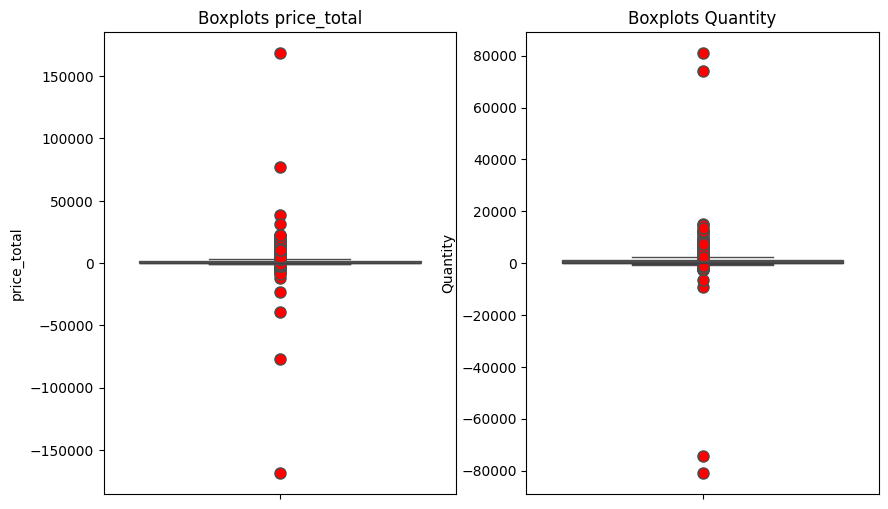

In [144]:
# Gráfico 1
plt.figure(figsize=(10, 6))
plt.subplot(121)
sns.boxplot(df['price_total'])
sns.boxplot(df.iloc[outliers_index_pricetotal, :]['price_total'], color='r', flierprops = dict(marker='o',            # Tipo de marcador
                  markerfacecolor='red', # Color de relleno del marcador
                  markersize=8,          # Tamaño del marcador
                  linestyle='none')
                              # Sin línea conectando los outliers,palette='Set2'
)
plt.title('Boxplots price_total')


plt.subplot(122)
sns.boxplot(df['Quantity'])
sns.boxplot(df.iloc[outliers_index_pricetotal, :]['Quantity'], color='r', flierprops = dict(marker='o',            # Tipo de marcador
                  markerfacecolor='red', # Color de relleno del marcador
                  markersize=8,          # Tamaño del marcador
                  linestyle='none')
                              # Sin línea conectando los outliers,palette='Set2'
)
plt.title('Boxplots Quantity')
plt.show()

Vamos a revisar que pasa si convertimos los valores negativos en positivos

In [145]:
df['Quantity'] = df['Quantity'].apply(lambda x: x*(-1) if x < 0 else x)

df['price_total'] = df['price_total'].apply(lambda x: x*(-1) if x < 0 else x)

In [146]:
df['Quantity'].min()

np.int64(1)

In [147]:
outliers_index_pricetotal = outliers_index(df, 'price_total')
outliers_index_quantity = outliers_index(df, 'Quantity')


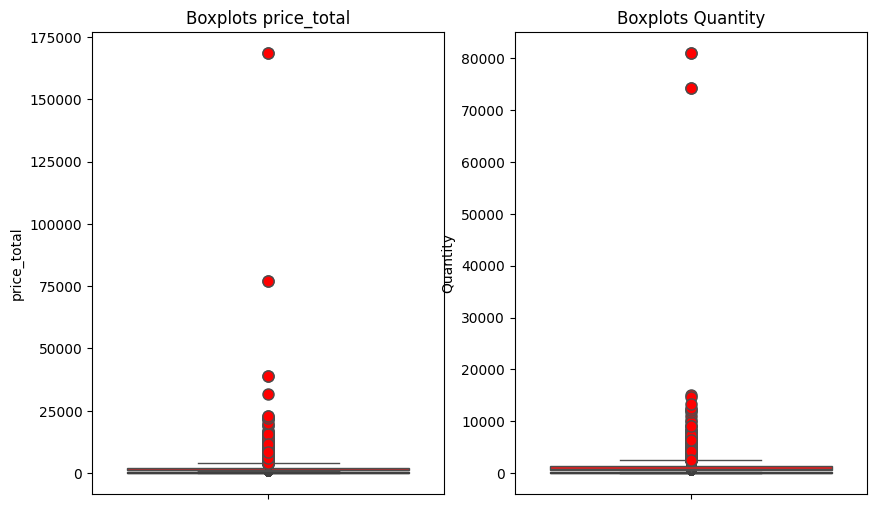

In [148]:
# Gráfico 1
plt.figure(figsize=(10, 6))
plt.subplot(121)
sns.boxplot(df['price_total'])
sns.boxplot(df.iloc[outliers_index_pricetotal, :]['price_total'], color='r', flierprops = dict(marker='o',            # Tipo de marcador
                  markerfacecolor='red', # Color de relleno del marcador
                  markersize=8,          # Tamaño del marcador
                  linestyle='none')
                              # Sin línea conectando los outliers,palette='Set2'
)
plt.title('Boxplots price_total')


plt.subplot(122)
sns.boxplot(df['Quantity'])
sns.boxplot(df.iloc[outliers_index_pricetotal, :]['Quantity'], color='r', flierprops = dict(marker='o',            # Tipo de marcador
                  markerfacecolor='red', # Color de relleno del marcador
                  markersize=8,          # Tamaño del marcador
                  linestyle='none')
                              # Sin línea conectando los outliers,palette='Set2'
)
plt.title('Boxplots Quantity')
plt.show()

In [88]:
print(f'El total de registros antes de la eliminacion son: {df.shape[0]}')

El total de registros antes de la eliminacion son: 22190


In [149]:
df.drop(index=outliers_index_pricetotal+outliers_index_quantity, inplace=True)


In [150]:
df[['Quantity', 'price_total']].describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,20163.0,139.393394,130.365181,1.0,29.000,106.0,211.000,586.0
price_total,20163.0,250.376144,203.358977,0.0,84.495,214.8,360.595,909.6


- La cantidad es normal que sea 1.
- Lo anormal que hay precios totales que son igual a 0

In [151]:
# Revisando los registros donde price_total es 0. 
df.loc[df['price_total']==0, :]

,InvoiceNo,InvoiceDate,CustomerID,Quantity,price_total,StockCode
2721,543599,2011-02-10,17560,16,0.0,1
11301,564651,2011-08-26,14646,576,0.0,4
12848,568384,2011-09-27,12748,1,0.0,1


In [152]:
df = df.loc[df['price_total']!=0, :]

In [153]:
df[['Quantity', 'price_total']].describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,20160.0,139.384722,130.332068,1.00,29.00,106.0,211.000,586.0
price_total,20160.0,250.413402,203.351168,0.38,84.68,214.8,360.655,909.6


In [154]:
df.sort_values(by='price_total',ascending=True).head(20)

,InvoiceNo,InvoiceDate,CustomerID,Quantity,price_total,StockCode
13792,570554,2011-10-11,14800,1,0.38,1
20636,561016,2011-07-22,14056,1,0.39,1
21397,570331,2011-10-10,14606,1,0.39,1
12594,567869,2011-09-22,16669,5,0.40,1
19196,543780,2011-02-11,17334,1,0.42,1
19376,545847,2011-03-07,15903,1,0.42,1
20533,559830,2011-07-13,16998,1,0.48,1
21601,573172,2011-10-28,16966,1,0.50,1
2379,542736,2011-01-31,14744,1,0.55,1
20157,555354,2011-06-02,16566,1,0.65,1


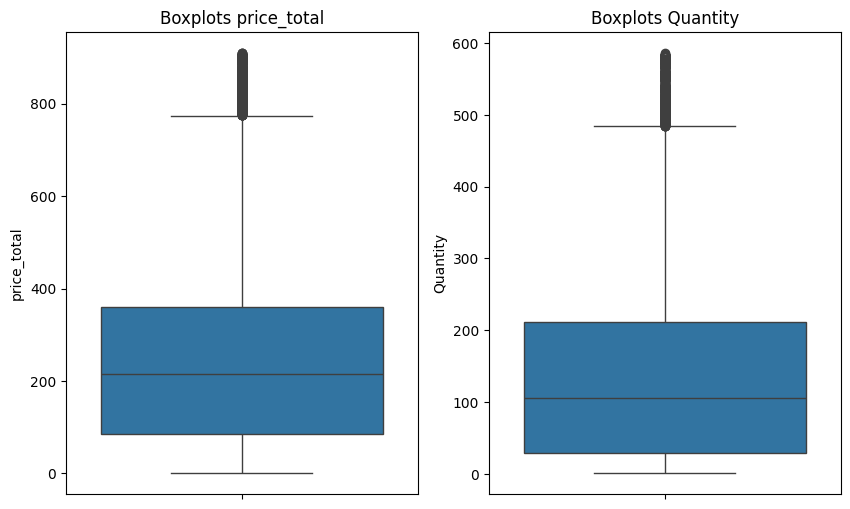

In [155]:
# Gráfico 1
plt.figure(figsize=(10, 6))
plt.subplot(121)
sns.boxplot(df['price_total'])

plt.title('Boxplots price_total')


plt.subplot(122)
sns.boxplot(df['Quantity'])
plt.title('Boxplots Quantity')
plt.show()

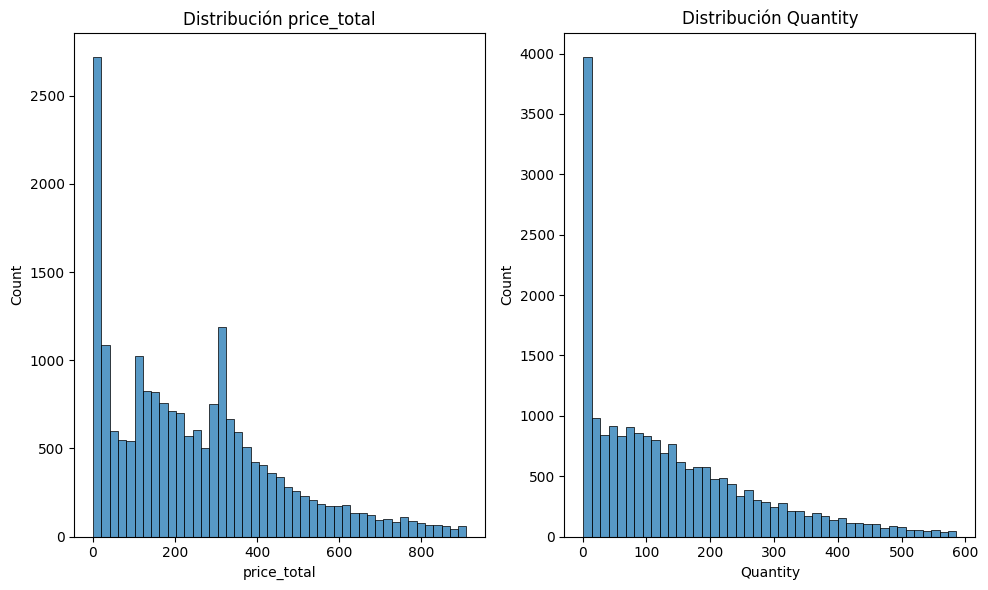

In [ ]:
plt.figure(figsize=(10, 6))

# Gráfico 1
plt.subplot(121) 
sns.histplot(df['price_total'])
plt.title('Distribución price_total')

# Gráfico 2
plt.subplot(122) 
sns.histplot(df['Quantity'])
plt.title('Distribución Quantity')

plt.tight_layout()
plt.show()

- Las distribuciones de los datos se encuentran en los parámetros esperados para nuestro contexto. Se favorecen lo totales mas bajos y las cantidades mas bajo también

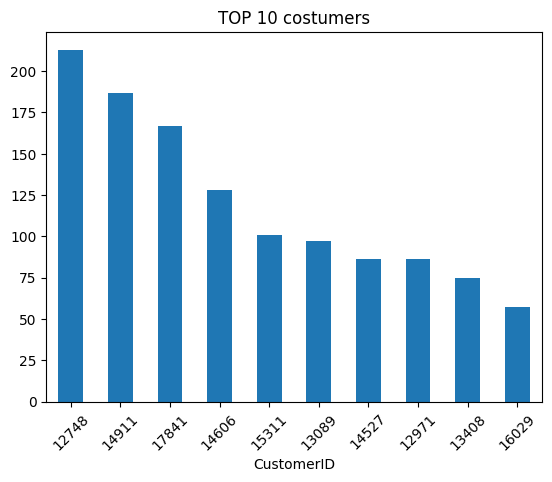

In [157]:
df.groupby('CustomerID')[['InvoiceNo']].size().sort_values(ascending=False)[:10].plot(kind='bar')
plt.title('TOP 10 costumers')
plt.xticks(rotation=45)
plt.show()

In [164]:
df_ = df.copy()

In [177]:
df_.set_index('InvoiceDate',inplace=True)

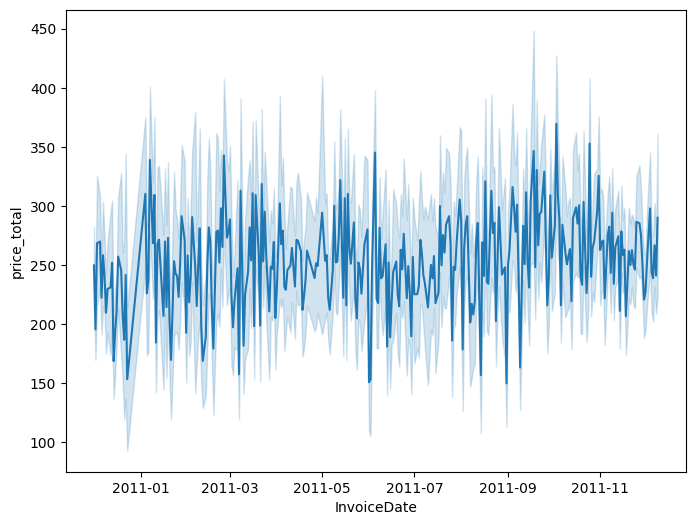

In [184]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=df_, x=df_.index, y='price_total')
plt.show()


<Axes: xlabel='InvoiceDate', ylabel='price_total'>

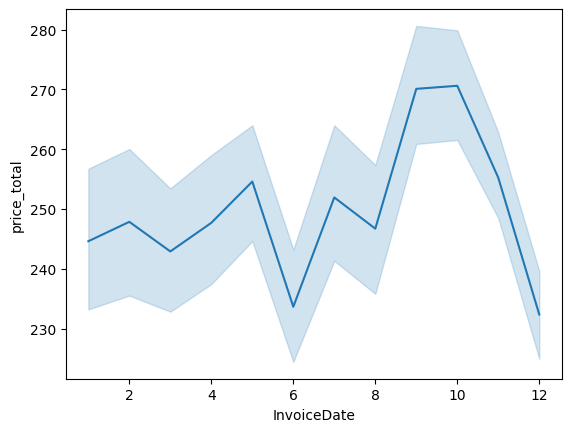

In [182]:
sns.lineplot(data=df_, x=df_.index.month, y='price_total')

<Axes: xlabel='InvoiceDate', ylabel='price_total'>

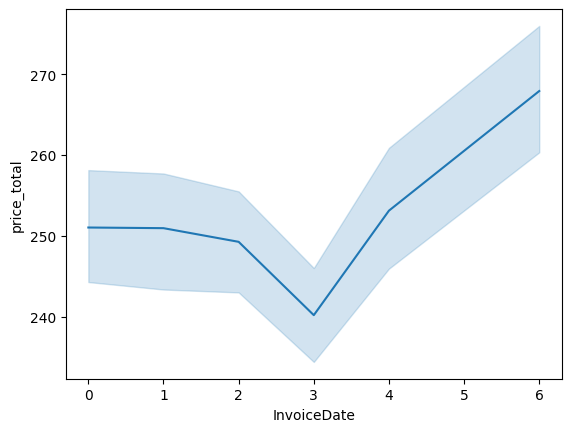

In [186]:
sns.lineplot(data=df_, x=df_.index.weekday, y='price_total')

<Axes: xlabel='InvoiceDate', ylabel='price_total'>

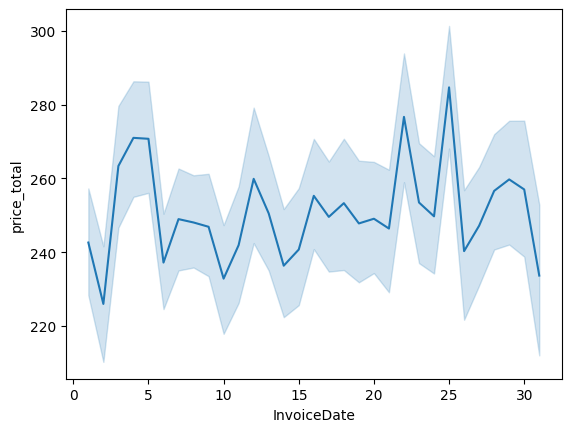

In [187]:
sns.lineplot(data=df_, x=df_.index.day, y='price_total')